## Homework
https://pad.gwdg.de/s/HJtiTE__U <br>
(2)* Produce a simple network with keras that can distinguish a 1D plot of a random Gaussian from a 1D plot of a random Lorentzian! (or other classes of functions)

### Imports Keras, Numpy, and matplotlib.pyplot

In [1]:
# keras:
from tensorflow.keras import Sequential # Sequential is the neural-network class
from tensorflow.keras.layers import Dense # Dense is the standard network layer

# array math:
import numpy as np
from scipy import stats

# plotting:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

### Define the network structure

In [2]:
# Define network:
Net=Sequential() # creating a neural network!
Net.add(Dense(50,input_shape=(100,),activation="relu"))
Net.add(Dense(50,activation="relu")) # second hidden layer: 10 neurons
Net.add(Dense(2,activation="softmax"))# output layer: 1 neuron "relu"

# Compile network: (randomly initialize weights, choose advanced optimizer, set up everything!)
Net.compile(loss='categorical_crossentropy',
              optimizer='adam') # adam is adaptive and works better than normal gradient descent

### Create training samples 

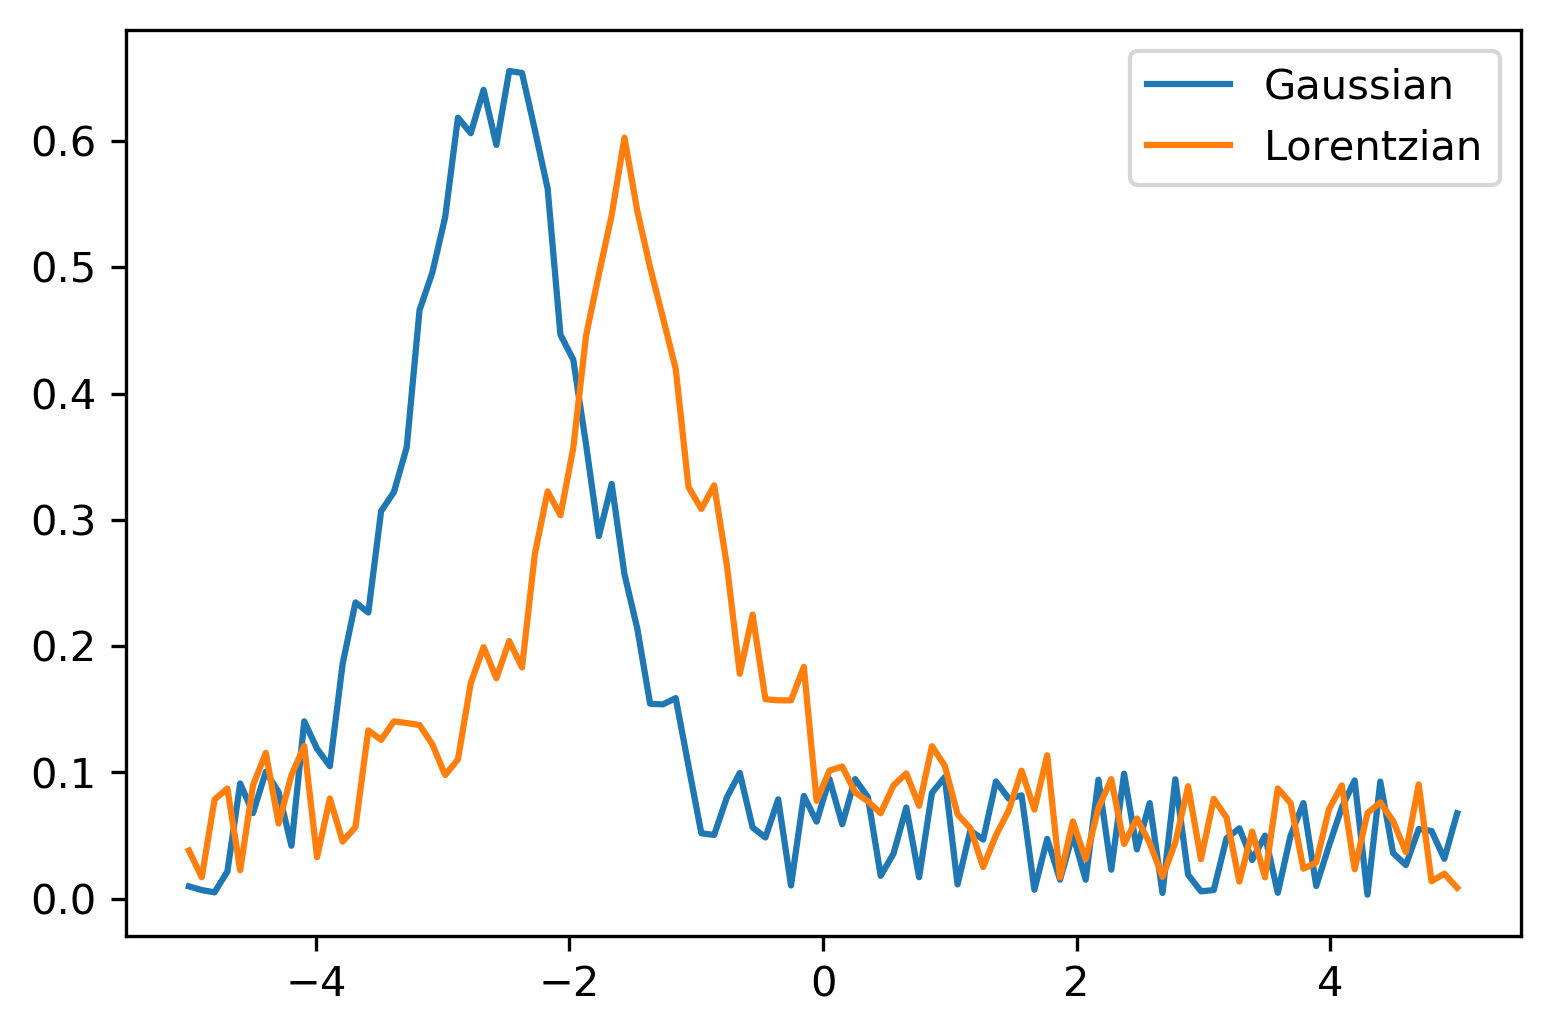

In [36]:
x=np.linspace(-5,5,100)
y0=stats.norm.pdf(x, loc=8*(np.random.random()-0.5), scale=2*np.random.random())+0.1*np.random.random([100,])
y1=stats.cauchy.pdf(x, loc=8*(np.random.random()-0.5), scale=2*np.random.random())+0.1*np.random.random([100,])
plt.plot(x,y0,label='Gaussian')
plt.plot(x,y1,label='Lorentzian')
plt.legend()
plt.show()

In [23]:
def my_target(x, batch_size):
    choice=np.random.randint(2,size=batch_size)
    y_in=np.zeros([batch_size,np.size(x)])
    y_target=np.zeros([batch_size,2])
    for i in range(batch_size):
        if choice[i]==0:
            y_in[i,:]=stats.norm.pdf(x,loc=8*(np.random.random()-0.5),scale=2*np.random.random())+0.1*np.random.random([100,])
            y_target[i,0]=1
        else: 
            y_in[i,:]=stats.cauchy.pdf(x,loc=8*(np.random.random()-0.5),scale=2*np.random.random())+0.1*np.random.random([100,])
            y_target[i,1]=1
    return [y_in, y_target]

## Training Network

In [27]:
training_batches=1000 # number of training batches
batchsize=100 # samples per batch
costs=np.zeros(training_batches) # array for storing costs
acc=np.zeros(training_batches)
inputsize=100 # if this is changed, the neural network input needs to be changed as well

# run through all training batches:
for j in range(training_batches):
    x=np.linspace(-5.0,5.0,inputsize)
    y_in, y_target=my_target(x,batchsize) # produce correct outputs (our target)
    costs[j]=Net.train_on_batch(y_in,y_target) # train on this batch of samples
    y_out=Net.predict_on_batch(y_in)
    acc[j]=np.sum(np.argmax(y_out, axis=1)==np.argmax(y_target, axis=1))/batchsize
    print(str(costs[j]),"    ",str(acc[j]),end="   \r") # print current cost function, overwrite line always

## Testing Network

In [28]:
N=10000 # number of points
y_in, y_target=my_target(np.linspace(-5,5,100), N) # prepare correct shape for network, here N becomes the batch size
y_out=Net.predict_on_batch(y_in) # apply the network to this set of points!
np.sum(np.argmax(y_out, axis=1)==np.argmax(y_target, axis=1))/N

0.9557

In [29]:
np.argmax(y_out, axis=1)==np.argmax(y_target, axis=1)

array([ True,  True,  True, ...,  True,  True,  True])

In [30]:
np.argmax(y_out, axis=1)

array([1, 1, 1, ..., 1, 1, 0])

In [31]:
np.argmax(y_target, axis=1)


array([1, 1, 1, ..., 1, 1, 0])

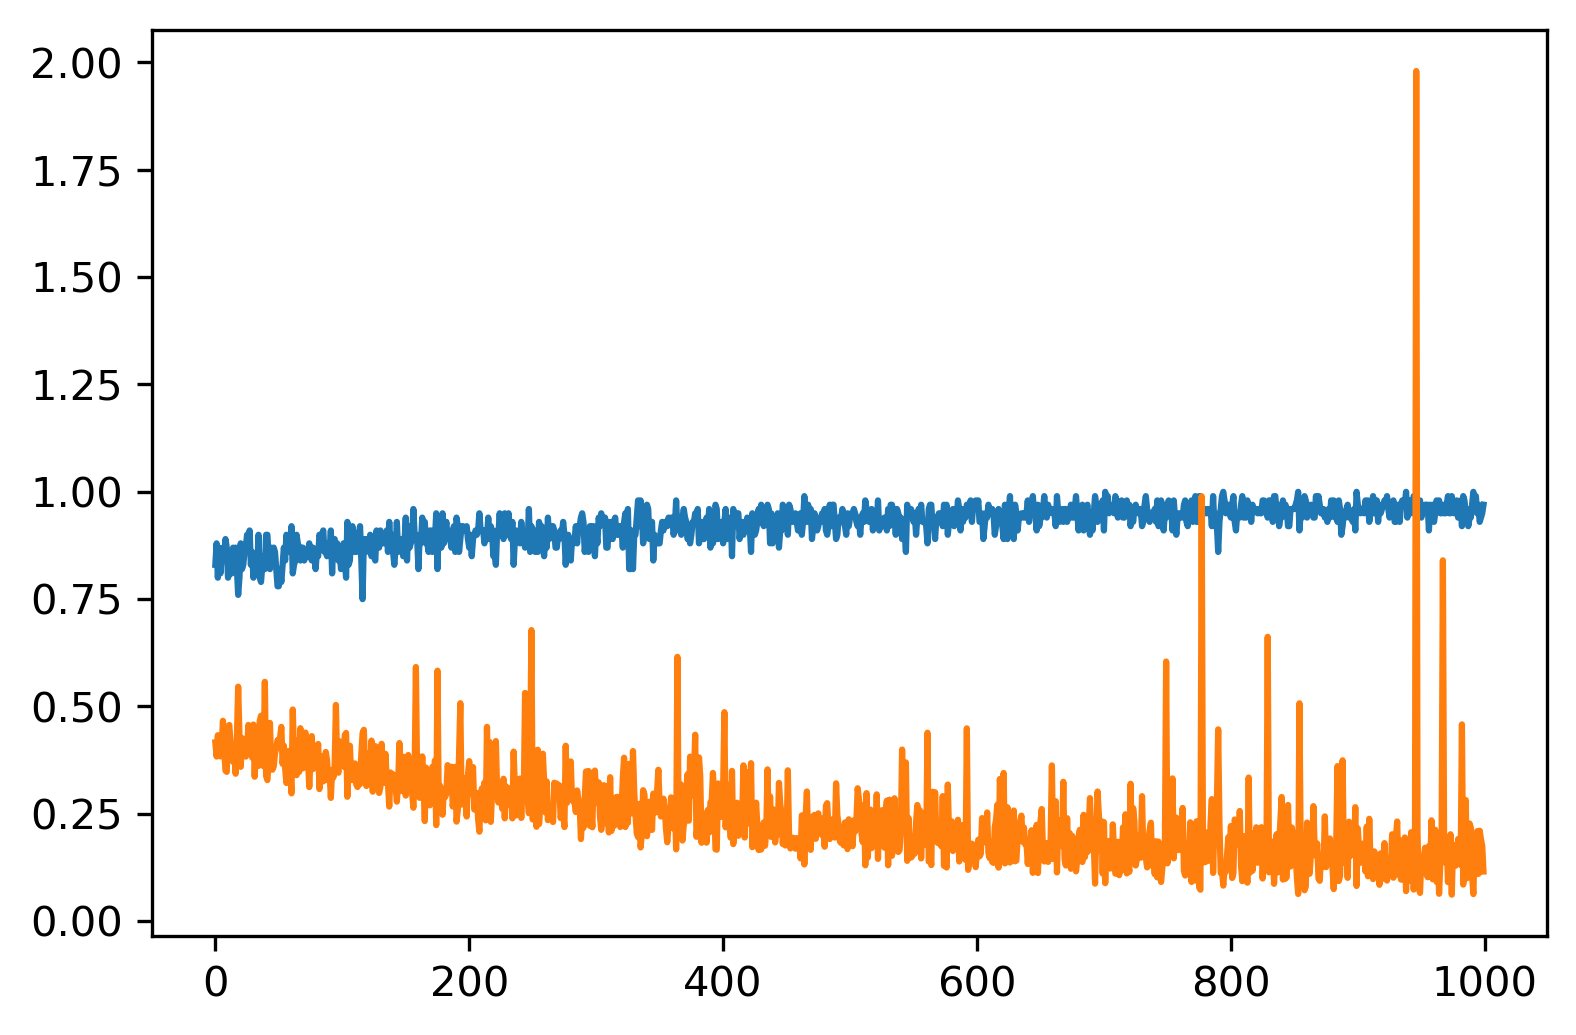

In [32]:
plt.plot(acc)
plt.plot(costs)